In [14]:
import IPython.display
import pandas as pd

from LSTM import *

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [15]:
#
# Load data
VM = load_VM('917.csv')
# Make it univariate
df = VM[['CPU usage [MHZ]']]
# df = VM

In [19]:
def reg2class(df, n_classes):
    label_encoder = LabelEncoder()
    # Create n_classes in the df
    classes = pd.cut(df, n_classes, retbins=True)
    # Class labels
    labels = label_encoder.fit_transform(classes[0])
    # Return also numeric value per class
    boundaries = classes[1]
    mean_class = []
    for i in range(len(boundaries)-1):
        mean_class.append(0.5*(boundaries[i]+ boundaries[i+1]))
    mean_class = np.array(mean_class)
    # Return only classes present in the dataset
    mean_class = mean_class[np.array(pd.cut(df, bins=n_classes).value_counts(sort=False)) != 0]
    return labels, mean_class

In [20]:
y, mean_class = reg2class(df['CPU usage [MHZ]'], 50)

In [9]:
def class2num(y, mean_class):
    return mean_class[y]

In [21]:
# From classes to numeric
numeric = class2num(y, mean_class)

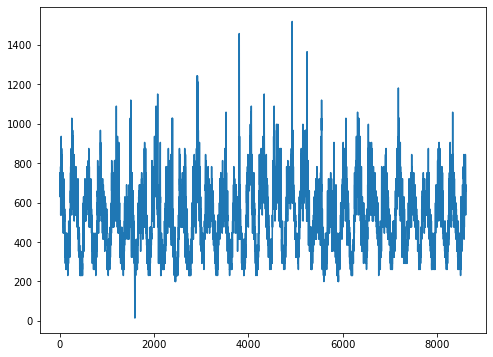

In [22]:
plt.plot(numeric)

In [13]:
max(y)+1

72

In [23]:
aux = pd.DataFrame(y)